<a href="https://colab.research.google.com/github/Pharseus/Machine-Learning/blob/main/Week_06_MLP_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. MLP with Keras
Copy this notebook to drive for submission

# Keras
https://keras.io/

Keras is a high-level API for building and training deep learning models. It is known for its user-friendly, modular, and extensible nature, making it accessible for both beginners and experienced practitioners.

**Why Keras is a good choice for machine learning:**

*   **Ease of Use:** Keras has a simple and consistent API that reduces cognitive load and makes it easy to quickly build and prototype neural networks.
*   **Modularity:** Models are built by connecting configurable building blocks (layers, optimizers, loss functions, etc.), allowing for flexible and creative model architectures.
*   **Extensibility:** You can easily create custom layers, metrics, and other components to tailor models to specific needs.
*   **Integration with TensorFlow:** Keras is the official high-level API for TensorFlow, providing seamless integration with TensorFlow's powerful features and scalability.
*   **Large Community and Resources:** Keras has a vast and active community, offering extensive documentation, tutorials, and pre-trained models.

These features make Keras a popular choice for a wide range of machine learning tasks, from simple classification to complex image and natural language processing.

Let's start by importing the necessary libraries:
1. pandas for data manipulation `import pandas as pd`
2. Keras for building and training the deep learning model `import keras`, and
3. Matplotlib for visualization. `import matplotlib.pyplot as plt`

In [ ]:
#@title **TO DO** Import the required library
import pandas as pd
import keras
import matplotlib.pyplot as plt

#1. Dataset

## Load csv using pandas

The pandas library provides the `read_csv()` function, which is a convenient way to load data from CSV files into a DataFrame. You simply provide the path to the CSV file as an argument to this function. You can find more information in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

For your information, this is what exists inside the csv

```
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
```

The first column is the target indicating which handritten number is the data represents

The second to last column is the pixel values [0, 255] in a total of 784 column &rarr; 28 &times; 28 pixel grayscale image

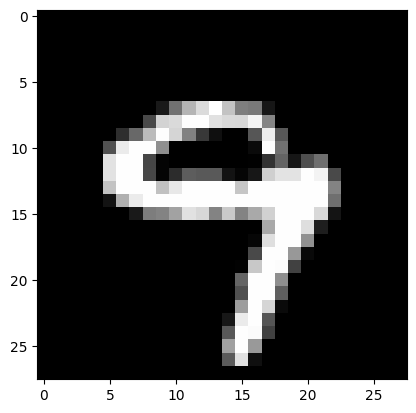

## **TO DO** Load the data from `sample_data/mnist_train_small.csv` using pandas as train data

In [ ]:
train = pd.read_csv('sample_data/mnist_train_small.csv')
train.head()

## **TO DO** Load the data from `sample_data/mnist_test.csv` using pandas as test data

In [ ]:
test = pd.read_csv('sample_data/mnist_test.csv')
test.head()

Let's try to display a sample data in index 5 and what is the target

In [ ]:
data_index = 5

print(f"Target : {train.iloc[data_index,0]}")
plt.imshow(train.iloc[data_index,1:].values.reshape(28,-1), cmap="gray")
plt.show()

Now we have to split between the input data and target data from the train and test data

In [ ]:
train_x = train.iloc[:,1:]
train_y = train.iloc[:, 0]
test_x = test.iloc[:,1:]
test_y = test.iloc[:, 0]

#2. Model

The model or classifier must be created to be trained

There are three ways to create Keras models:

1.  **Sequential API:** This is the simplest way to build models, where layers are stacked in a linear fashion. It's suitable for simple feedforward networks.
2.  **Functional API:** This allows for more complex model architectures with multiple inputs, outputs, and shared layers, as demonstrated above.
3.  **Subclassing API:** This provides the most flexibility, allowing you to define your own custom model class by subclassing `tf.keras.Model`. This is useful for models with custom training loops or complex internal logic.

You can find more information about these methods in the [Keras Models documentation](https://keras.io/api/models/).


## Functional API

The Keras functional API is a way to create models that are more flexible than the `Sequential` API. It allows you to define models where layers are connected in more complex ways, such as multi-input or multi-output models, or models with shared layers.

To use the functional API, you create input layers using `keras.Input` ([documentation](https://keras.io/api/layers/input_and_preprocessing/input_layer/)), then define the layers and connect them by calling layers on the inputs or outputs of other layers. Finally, you create the model using `keras.Model` ([documentation](https://keras.io/api/models/model/)), specifying the input and output layers.

Here is an example of creating an MLP with :
1.  An **Input layer** that accepts 10 features. You can learn more about the Input layer in the [Keras Input layer documentation](https://keras.io/api/layers/input_and_preprocessing/input_layer/).
2.  A **Dense layer** with 20 neuron and 'tanh' activation function. This is a hidden layer that learns complex patterns from the input data. You can find details about Dense layers in the [Keras Dense layer documentation](https://keras.io/api/layers/core_layers/dense/).
4.  An **Output layer** with 5 neuron and 'sigmoid' activation function. The sigmoid activation ensures that the output values are probabilities that sum up to 1, representing the model's confidence in each category/class.

List of available activation funcition [Activation Functions](https://keras.io/api/layers/activations/#available-activations)
```
def mlp():
    # MLP Architecture
    inputs = keras.Input(shape=(10,))
    x = layers.Dense(20, activation='tanh')(inputs)
    x = layers.Dense(5, activation='sigmoid')

    # Combining into a model
    model = keras.Model(inputs=inputs, outputs=x)
    return model

# Initializing the model
model = mlp()
```

## **TO DO** Create a Multilayer Perceptron (MLP) model using the Functional API

Now, let's create a Multilayer Perceptron (MLP) model using the Keras Functional API. The architecture of the model will be as follows:

1.  An **Input layer** that accepts the flattened image data (28 * 28 = 784 features).
2.  A **Dense layer** with 20 neurons and 'sigmoid' activation function.
3.  An **Output layer** with 10 neurons (one for each digit 0-9) and 'sigmoid' activation function. The sigmoid activation ensures that the output values between 1 and 0, representing the model's prediction in each digit.

In [ ]:
from keras import layers

def perceptron(input_size):
    # Create the model here
    inputs = keras.Input(shape=(input_size,))
    x = layers.Dense(20, activation='sigmoid')(inputs) #chaining
    x = layers.Dense(10, activation='sigmoid')(x)

    # Combining into a model
    model = keras.Model(inputs=inputs, outputs=x)
    return model

model.summary()
model = perceptron(784)

# 3. Train

In this section, we will train the model using the training data.

## **TO DO** Prepare the target data

Before training, we need to convert the integer target labels (`train_y`) to a one-hot encoded format using the `to_categorical` function from Keras, as our model's output layer uses 'softmax' and has 10 neurons. You can find more details about `to_categorical` in the [Keras utilities documentation](https://keras.io/api/utils/python_utils/#to_categorical).



In [ ]:
from keras.utils import to_categorical
train_y_one_hot = to_categorical(train_y)
# print(train_y_one_hot)


## **TO DO** Compile the model

We will compile the model using '**MeanSquaredError**' loss, the '**SGD**' optimizer with learning rate of 1e-3, and '**accuracy**' as a metric.

example :
```
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.FalseNegatives(),
    ],
)
```

See available loss classes [here](https://keras.io/api/losses/#loss-class),

optimizers [here](https://keras.io/api/optimizers/),

and metrics [here](https://keras.io/api/metrics/)

In [ ]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.Accuracy()]
)


## **TO DO** Train the model

Finally, we will train the model using the `fit()` method with the training data, batch size, epochs, and a validation split.
1. batch_size set it to 128
2. epochs set it to 100
3. validation_split set it to 0.3

In [ ]:
batch_size = 128
epochs = 100
validation_split = 0.3

model.fit(
    train_x,
    train_y_one_hot,
    batch_size=batch_size,
    epochs=epoch,
    validation_split=validation_split)

In [ ]:
#@title plot the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 4. Evaluate the Model

After training the model, we need to evaluate its performance on unseen data to get an idea of how well it generalizes. We will use the test dataset that we loaded earlier for this purpose.

We can use the `evaluate()` method of the Keras model to calculate the loss and metrics (like accuracy) on the test data. This method takes the test input data and the corresponding true labels as arguments.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
loss, accuracy = model.evaluate(test_x, to_categorical(test_y))
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 5. Hyperparameter Testing
Try to change hyperparameter exists in this notebook. Here are the list of hyperparameters that you can change

1. MLP Architecture (number of layers and neuron) and its activation functions
2. batch_size
3. epochs
4. Learning rate
5. Loss function

It is possible to achieve accuracy of 0.95 or more

In [ ]:
from keras import layers

# ============================= #
# Create the model architecture #
# ============================= #

def modified_perceptron(input_size):
    # Create the model here
    inputs = keras.Input(shape=(input_size,))
    x = layers.Dense(20, activation='tanh')(inputs)
    # x = layers.Dense(10, activation='sigmoid')(x)
    x = layers.Dense(10, activation='softmax')(x)

    # Combining into a model
    model = keras.Model(inputs=inputs, outputs=x)
    return model

model2 = modified_perceptron(784)

# ====================================== #
# Choose the optimizer and loss function #
# ====================================== #

model2.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()]
)

# ============================ #
# Choose other hyperparameters #
# ============================ #

batch_size = 256 #berapa banyak sampel yang diproses sekaligus sebelum model melakukan update bobot
epochs = 200
validation_split = 0.3

# =============== #
# Train the model #
# =============== #

model2.fit(
    train_x,
    train_y_one_hot,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split)

# ============== #
# Test the model #
# ============== #

loss, accuracy = model2.evaluate(test_x, to_categorical(test_y))
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# sigmoid + binary crossentropy menganggap tiap kelas independen → cocok untuk multi-label (misalnya gambar bisa kucing dan anjing).

# softmax + categorical crossentropy menganggap hanya ada satu kelas benar per data → cocok untuk multi-class (seperti MNIST digit).



In [ ]:
#@title plot the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model2.history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(model2.history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model2.history.history['loss'], label='Training Loss')
plt.plot(model2.history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#dalam setiap epoch terlihat bahwa accuracy semakin meningkat dan loss menurun